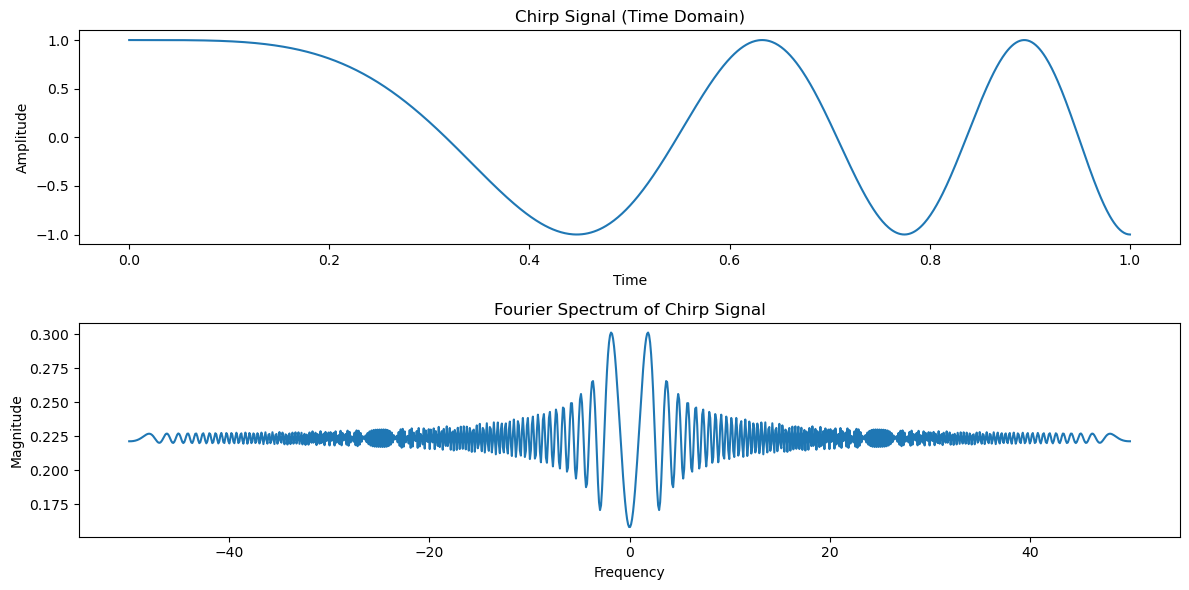

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, cos, pi, fourier_transform, Heaviside
from sympy.abc import t, w
from sympy.integrals.transforms import inverse_fourier_transform

# Define symbols
t, w = symbols('t w')

# Define the chirp signal: frequency increases linearly with time
# Assume the chirp starts at t=0 and increases with a rate 'k' up to t=1.
A = 1  # amplitude of the chirp
k = 5  # frequency rate (rate of increase in frequency with time)
chirp_signal = A * cos(2 * pi * k * t**2 / 2) * Heaviside(t)

# Compute the Fourier Transform of the chirp signal
chirp_fourier = fourier_transform(chirp_signal, t, w)

# Convert to a function for plotting
chirp_func = chirp_signal.subs(Heaviside(t), 1)
chirp_fourier_func = chirp_fourier

# Plot the time-domain chirp signal
time_vals = np.linspace(0, 1, 1000)
chirp_vals = [chirp_func.subs(t, val).evalf() for val in time_vals]

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_vals, chirp_vals)
plt.title('Chirp Signal (Time Domain)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the frequency-domain (Fourier Transform)
freq_vals = np.linspace(-50, 50, 1000)
chirp_fourier_vals = [chirp_fourier_func.subs(w, val).evalf() for val in freq_vals]

plt.subplot(2, 1, 2)
plt.plot(freq_vals, np.abs(chirp_fourier_vals))
plt.title('Fourier Spectrum of Chirp Signal')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


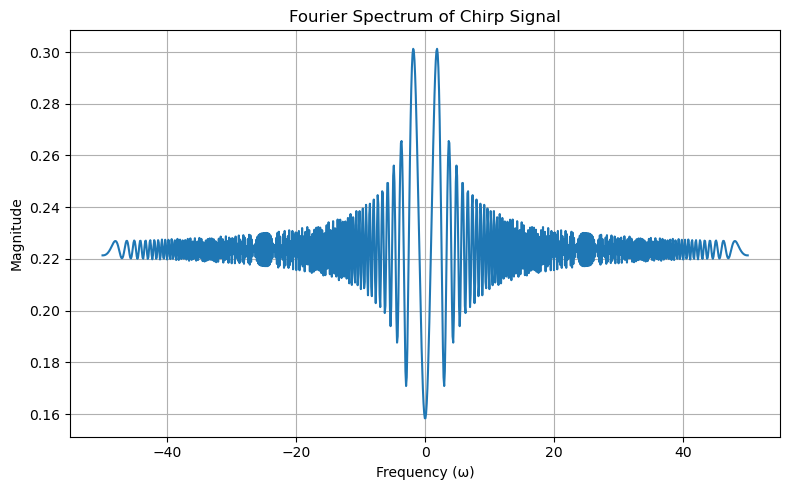

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, cos, pi, fourier_transform, Heaviside
from sympy.abc import t, w

# Define symbols
t, w = symbols('t w')

# Define the chirp signal: frequency increases linearly with time
# Assume the chirp starts at t=0 and increases with a rate 'k' up to t=1.
A = 1  # amplitude of the chirp
k = 5  # frequency rate (rate of increase in frequency with time)
chirp_signal = A * cos(2 * pi * k * t**2 / 2) * Heaviside(t)

# Compute the Fourier Transform of the chirp signal
chirp_fourier = fourier_transform(chirp_signal, t, w)

# Convert to a function for plotting
chirp_fourier_func = chirp_fourier.simplify()

# Plot the Fourier spectrum (magnitude of the Fourier transform)
freq_vals = np.linspace(-50, 50, 1000)
chirp_fourier_vals = [chirp_fourier_func.subs(w, val).evalf() for val in freq_vals]

plt.figure(figsize=(8, 5))
plt.plot(freq_vals, np.abs(chirp_fourier_vals))
plt.title('Fourier Spectrum of Chirp Signal')
plt.xlabel('Frequency (ω)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


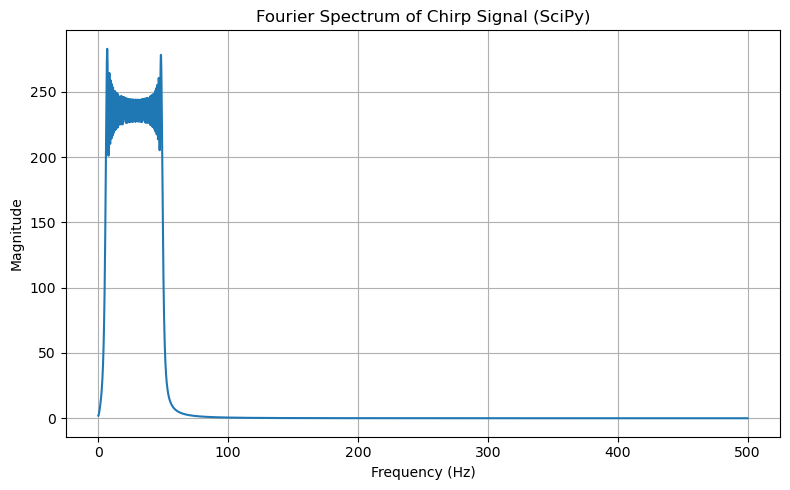

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp
from scipy.fftpack import fft, fftfreq

# Parameters for the chirp signal
t_start = 0  # Start time
t_end = 10   # End time (duration)
fs = 1000    # Sampling frequency (samples per second)
t = np.linspace(t_start, t_end, fs * (t_end - t_start))

# Generate a chirp signal: frequency increases linearly from 5 Hz to 100 Hz
f0 = 5    # Start frequency
f1 = 50  # End frequency
chirp_signal = chirp(t, f0=f0, t1=t_end, f1=f1, method='linear')

# Compute the Fourier Transform using FFT
chirp_fft = fft(chirp_signal)
n = len(chirp_signal)
frequencies = fftfreq(n, 1/fs)

# Only take the positive half of the frequencies and corresponding FFT values
positive_frequencies = frequencies[:n // 2]
magnitude_spectrum = np.abs(chirp_fft[:n // 2])

# Plot the Fourier spectrum
plt.figure(figsize=(8, 5))
plt.plot(positive_frequencies, magnitude_spectrum)
plt.title('Fourier Spectrum of Chirp Signal (SciPy)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()
